In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# from fastai.vision import * 
# from fastai.callbacks.hooks import *
# from fastai.utils.mem import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')

*  -N : Non-ecotic beats (normal beat)
*  -S : Supraventricular ectopic beats 
*  -V : Ventricular ectopic beats 
*   F : Fusion Beats 
*  -Q : Unknown Beats










In [ ]:
data=pd.read_csv('/content/drive/My Drive/heart-disease-uci/heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.shape
data.info



<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
data = data.rename(columns= {'cp': 'chest_pain_type' , 'trestbps': 'resting_blood_pressure' , 'chol' : 'cholesterol',                                             'fbs': 'fasting_blood_sugar' , 'restecg' : 'rest_ecg' ,'thalach' : 'max_heart_rate_achieved',
                                             'exang' : 'exercise_induced_angina' , 'oldpeak' : 'st_depression' , 'slope' : 'st_slope',
                                             'ca' : 'num_major_vessels' , 'thal' : 'thalassemia'})

In [ ]:
data.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# View the last 10 rows in the data set by .tail()



In [ ]:
data.tail(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
print('View missing values in the data')
data.isnull()
# path.ls()

View missing values in the data


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print('=============================')
data.isnull().sum()
# lbl_names = get_image_files(path_lbl)
# lbl_names[:3]

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [ ]:
data['sex'][data['sex'] == 0] = 'Female'
data['sex'][data['sex'] == 1] = 'Male'
# img_f = fnames[0]
# img = open_image(img_f)
# img.show(figsize=(7,7))

In [ ]:
data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'
# get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [ ]:
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'
# Convert exercise_included_angina
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'
# Convert solpe column data
data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'
# convert Thalassemia column data
data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'


# mask = open_mask(get_y_fn(img_f))
# mask.show(figsize=(7,7), alpha=1)
# src_size = np.array(mask.shape[1:])
# src_size,mask.data

In [ ]:
data.head(10)# codes = np.loadtxt(path/'codes.txt', dtype=str); codes

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,Male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,Female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,Male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,Female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
5,57,Male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,upsloping,0,normal,1
6,56,Female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,1
7,44,Male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,0,reversable defect,1
8,52,Male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,flat,0,reversable defect,1
9,57,Male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,flat,0,fixed defect,1


In [ ]:
data.describe().transpose()
# size = src_size//2

# free = gpu_mem_get_free_no_cache()
# # the max size of bs depends on the available GPU RAM
# if free > 8200: bs=8
# else:           bs=4
# print(f"using bs={bs}, have {free}MB of GPU RAM free")

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
num_major_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [ ]:
print('==================Gender=======================')
print(data['sex'].value_counts())
print('==================Fasting Blood Sugar=======================')
print(data['fasting_blood_sugar'].value_counts())
print('==================Chest Pain type=======================')
print(data['chest_pain_type'].value_counts())
print('==================Rest ECG=======================')
print(data['rest_ecg'].value_counts())
print('====================Exercise Induced Angina=====================')
print(data['exercise_induced_angina'].value_counts())
print('==================ST Slope=======================')
print(data['st_slope'].value_counts())
print('==================thalassemia=======================')
print(data['thalassemia'].value_counts())
# src = (SegmentationItemList.from_folder(path_img)
#        .split_by_fname_file('../valid.txt')
#        .label_from_func(get_y_fn, classes=codes))
# data = (src.transform(get_transforms(), size=size, tfm_y=True)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))
# data.show_batch(2, figsize=(10,7))

==================Gender=======================
Male      207
Female     96
Name: sex, dtype: int64
==================Fasting Blood Sugar=======================
lower than 120mg/ml      258
greater than 120mg/ml     45
Name: fasting_blood_sugar, dtype: int64
==================Chest Pain type=======================
typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64
==================Rest ECG=======================
ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64
====================Exercise Induced Angina=====================
no     204
yes     99
Name: exercise_induced_angina, dtype: int64
==================ST Slope=======================
flat         142
upsloping    140
0             21
Name: st_slope, dtype: int64
==================thalassemia=======================
fixed defect         166
reversable defect    117
n

Categorical data: Categorical data represent characteristics such as a person's gender, marital status, hometown, or the types of movies they like.

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.


In [ ]:
from scipy.stats import skew , kurtosis
print("skewness of the age" , skew(data['age']))
print("Kurtosis of Age ", kurtosis(data['age']))
# data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)
print("skewness of the resting_blood_pressure" , skew(data['resting_blood_pressure']))
print("Kurtosis of resting_blood_pressure ", kurtosis(data['resting_blood_pressure']))
print("skewness of the cholesterol" , skew(data['cholesterol']))
print("Kurtosis of cholesterol ", kurtosis(data['cholesterol']))
print("skewness of the max_heart_rate_achieved" , skew(data['max_heart_rate_achieved']))
print("Kurtosis of max_heart_rate_achieved ", kurtosis(data['max_heart_rate_achieved']))
print("skewness of the st_depression" , skew(data['st_depression']))
print("Kurtosis of st_depression ", kurtosis(data['st_depression']))


# name2id = {v:k for k,v in enumerate(codes)}
# void_code = name2id['Void']

# def acc_camvid(input, target):
#     target = target.squeeze(1)
#     mask = target != void_code
#     return (input.argmax(dim=1)[mask]==target[mask]).float().mean()
# metrics=acc_camvid
# # metrics=accuracy
# wd=1e-2
# learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)
# lr_find(learn)
# learn.recorder.plot()


skewness of the age -0.2014596901125439
Kurtosis of Age  -0.55299857127345
skewness of the resting_blood_pressure 0.7102300604861443
Kurtosis of resting_blood_pressure  0.8940569555069118
skewness of the cholesterol 1.1377326187082244
Kurtosis of cholesterol  4.411682119729873
skewness of the max_heart_rate_achieved -0.5347455419075503
Kurtosis of max_heart_rate_achieved  -0.08068888039194055
skewness of the st_depression 1.2634255245891595
Kurtosis of st_depression  1.5301925815010025


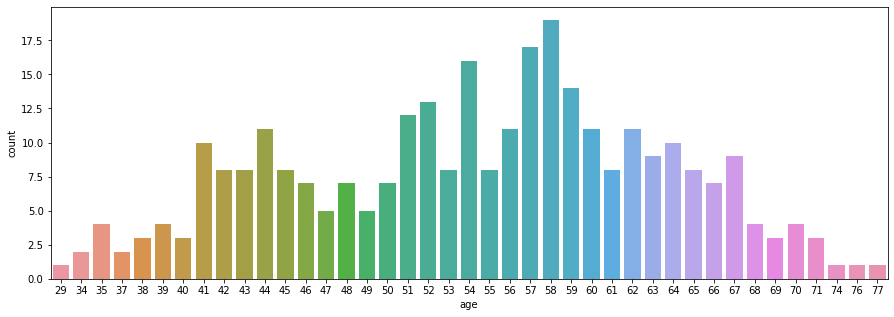

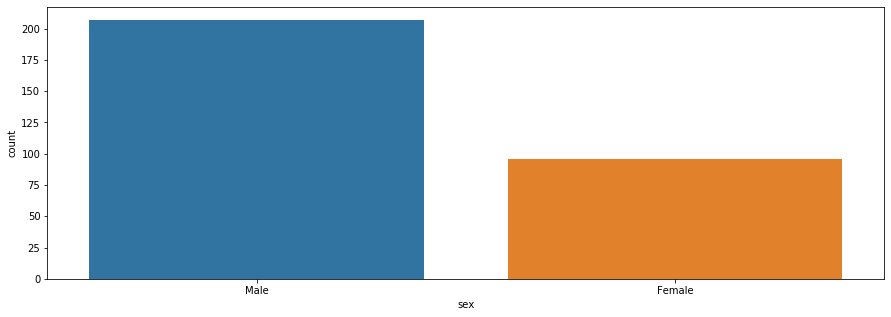

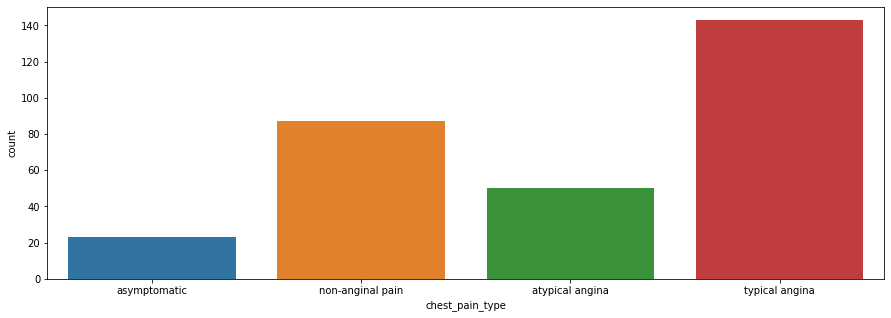

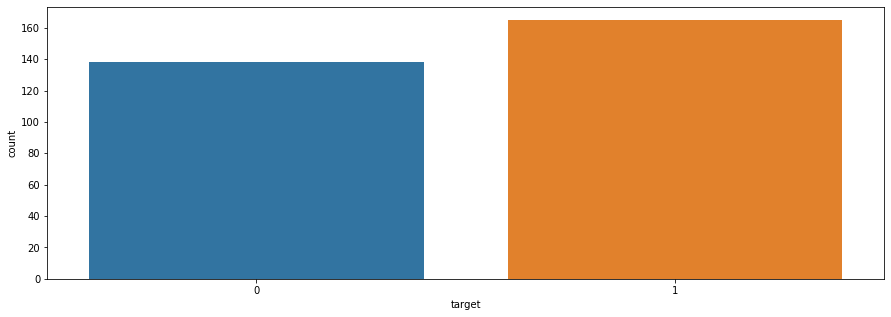

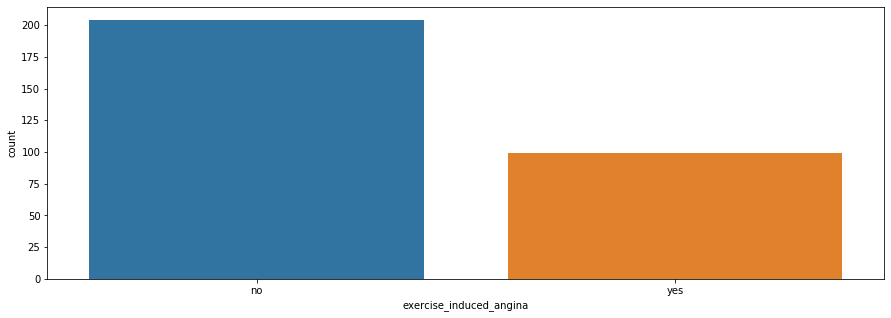

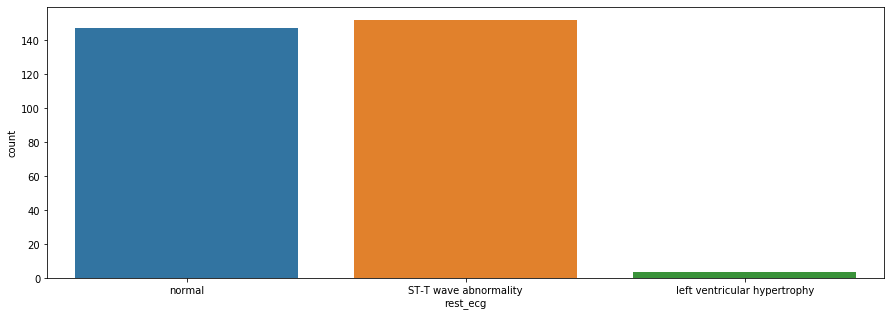

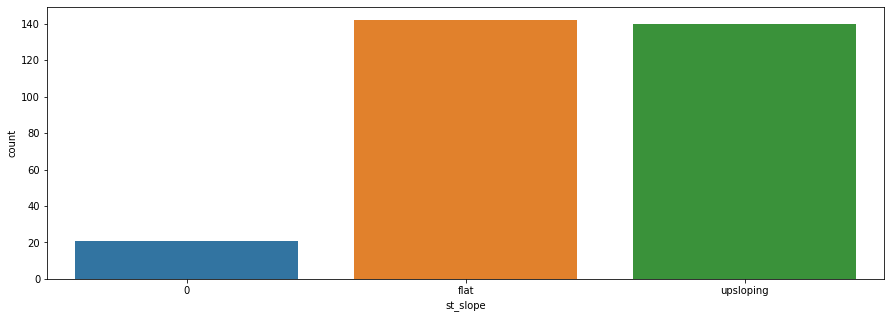

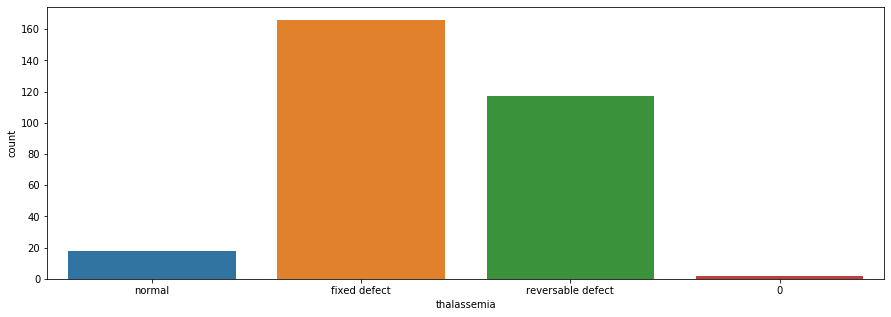

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['age'])
plt.show()

fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['sex'])
plt.show()

fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['chest_pain_type'])
plt.show()

fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['target'])
plt.show()

fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['exercise_induced_angina'])
plt.show()

fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['rest_ecg'])
plt.show()

fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['st_slope'])
plt.show()

fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data['thalassemia'])
plt.show()
# lr=3e-3
# learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

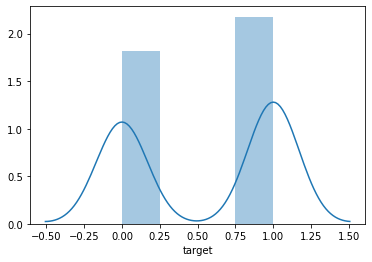

In [ ]:
sns.distplot(data['target'])



# learn.save('stage-1')
# learn.load('stage-1');

# learn.show_results(rows=6, figsize=(10,10))

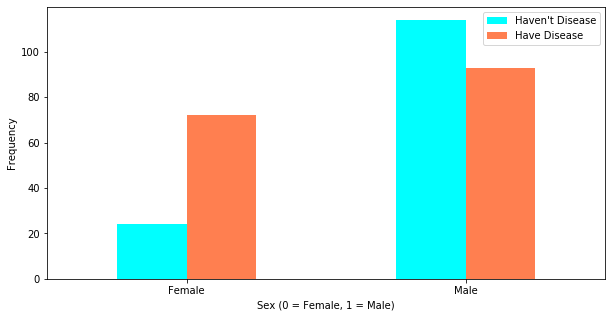

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


# learn.unfreeze()
# lrs = slice(lr/400,lr/4)
# learn.fit_one_cycle(5, lrs, pct_start=0.8)

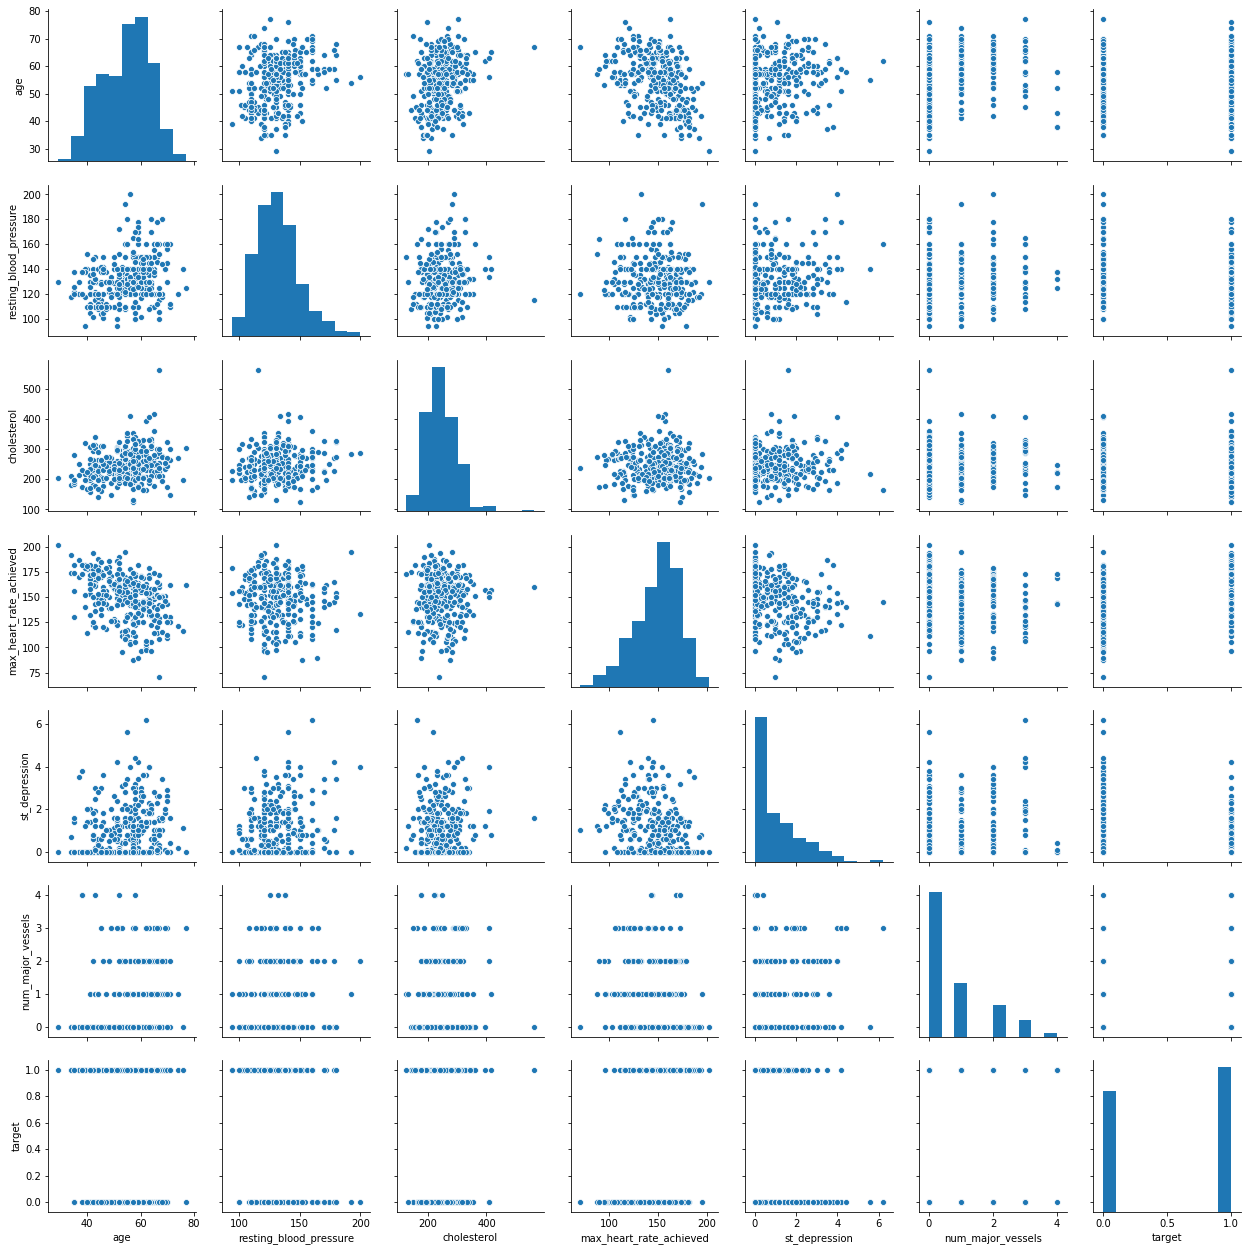

In [ ]:
sns.pairplot(data=data)

# img1 = learn.data.train_ds[0][0]
# learn.predict(img1)


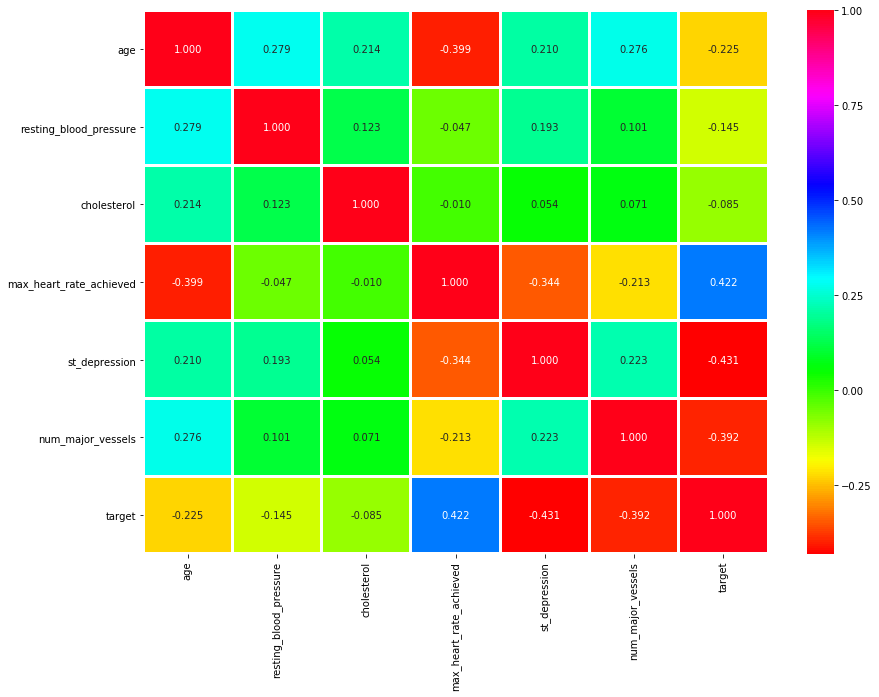

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

# learn.data.classes
# len(learn.data.classes)

In [ ]:
data.groupby('chest_pain_type', as_index=False)['target'].mean()

,chest_pain_type,target
0,asymptomatic,0.695652
1,atypical angina,0.820000
2,non-anginal pain,0.793103
3,typical angina,0.272727


In [ ]:
data.groupby('st_slope',as_index=False)['target'].mean()

,st_slope,target
0,0,0.428571
1,flat,0.753521
2,upsloping,0.350000


In [ ]:
data.groupby('thalassemia',as_index=False)['target'].mean()

,thalassemia,target
0,0,0.500000
1,fixed defect,0.783133
2,normal,0.333333
3,reversable defect,0.239316


In [ ]:
data.groupby('target').mean()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


In [ ]:
data.chest_pain_type = data.chest_pain_type.astype("category")
data.exercise_induced_angina = data.exercise_induced_angina.astype("category")
data.fasting_blood_sugar = data.fasting_blood_sugar.astype("category")
data.rest_ecg = data.rest_ecg.astype("category")
data.sex = data.sex.astype("category")
data.st_slope = data.st_slope.astype("category")
data.thalassemia = data.thalassemia.astype("category")
# Dummy values
data1 = pd.get_dummies(data, drop_first=True)
data1.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_Male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import scale
scale(data1)

array([[ 0.9521966 ,  0.76395577, -0.25633371, ..., -1.10076284,
         3.97911213, -0.79311554],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.9084609 ,
        -0.25131234, -0.79311554],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.9084609 ,
        -0.25131234, -0.79311554],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ..., -1.10076284,
        -0.25131234,  1.26085034],
       [ 0.29046364, -0.09273778, -2.2275329 , ..., -1.10076284,
        -0.25131234,  1.26085034],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.9084609 ,
        -0.25131234, -0.79311554]])

In [ ]:
np.exp(scale(data1))

array([[ 2.59139568,  2.1467515 ,  0.77388367, ...,  0.33261725,
        53.46953908,  0.45243302],
       [ 0.14729574,  0.91143246,  1.07486975, ...,  2.48050185,
         0.7777794 ,  0.45243302],
       [ 0.22897154,  0.91143246,  0.44185536, ...,  2.48050185,
         0.7777794 ,  0.45243302],
       ...,
       [ 4.49803545,  2.0275798 ,  0.35723802, ...,  0.33261725,
         0.7777794 ,  3.52842058],
       [ 1.33704726,  0.91143246,  0.10779404, ...,  0.33261725,
         0.7777794 ,  3.52842058],
       [ 1.33704726,  0.91143246,  0.82007682, ...,  2.48050185,
         0.7777794 ,  0.45243302]])

In [ ]:
x = data1.drop(['target'], axis = 1)
y = data1.target.values

In [ ]:
x

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_Male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,1,1,0,0,1,0,1,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,1,0,0,0,0,1,0,0,1
300,68,144,193,141,3.4,2,1,0,0,1,0,0,0,0,0,1,0,0,1
301,57,130,131,115,1.2,1,1,0,0,1,1,0,0,1,0,1,0,0,1


In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_pred = logmodel.predict(x_test)
LR_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(LR_pred,y_test))

[[21  3]
 [ 7 30]]


In [ ]:
from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(LR_pred,y_test)
LR_accuracy

0.8360655737704918

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Fit the Model
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_pred = classifier.predict(x_test)
knn_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(knn_pred,y_test))

[[14  7]
 [14 26]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(knn_pred,y_test)
accuracy_knn


0.6557377049180327

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
classifier1 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier1
# Fit the model
classifier1.fit(x_train,y_train)
# Predict the model
DT_pred = classifier1.predict(x_test)
DT_pred
print(confusion_matrix(DT_pred,y_test))
accuracy_DT = accuracy_score(DT_pred,y_test)
accuracy_DT


[[19  3]
 [ 9 30]]


0.8032786885245902